<a href="https://colab.research.google.com/github/zyf2021/-/blob/main/CNN_2_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Рабочие заметки
1.   Выбрать **Accuracy** или **Recall** или **Precision**
2.   **Accuracy** рассчитывается как отношение количества правильных прогнозов к их общему количеству.
3.   **Recall** рассчитывается как отношение числа Positive выборок, корректно классифицированных как Positive, к общему количеству Positive семплов.
4.   **Precision** представляет собой отношение числа семплов, верно классифицированных как Positive, к общему числу выборок с меткой Positive (распознанных правильно и неправильно). 


Испльзовать RECALL


In [ ]:
https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
!unzip /content/drive/MyDrive/Виноградники/Dataset.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: Dataset/train/2/frame_421.jpg  
  inflating: Dataset/train/2/frame_423.jpg  
  inflating: Dataset/train/2/frame_425.jpg  
  inflating: Dataset/train/2/frame_426.jpg  
  inflating: Dataset/train/2/frame_427.jpg  
  inflating: Dataset/train/2/frame_43.jpg  
  inflating: Dataset/train/2/frame_46.jpg  
  inflating: Dataset/train/2/frame_47.jpg  
  inflating: Dataset/train/2/frame_48.jpg  
  inflating: Dataset/train/2/frame_49.jpg  
  inflating: Dataset/train/2/frame_5.jpg  
  inflating: Dataset/train/2/frame_50.jpg  
  inflating: Dataset/train/2/frame_51.jpg  
  inflating: Dataset/train/2/frame_52.jpg  
  inflating: Dataset/train/2/frame_53.jpg  
  inflating: Dataset/train/2/frame_54.jpg  
  inflating: Dataset/train/2/frame_55.jpg  
  inflating: Dataset/train/2/frame_57.jpg  
  inflating: Dataset/train/2/frame_59.jpg  
  inflating: Dataset/train/2/frame_59138.jpg  
  inflating: Dataset/train/2/frame_59139.jpg 

In [ ]:
!pip install torch torchvision torchaudio numpy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torchvision
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from PIL import Image

In [ ]:
def check_image(path):
    try:
        im = Image.open(path)
        return True
    except:
        return False

In [ ]:

plt.rcParams['figure.figsize'] = 14, 6
  

normalize_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((128,128)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean = (0.5, 0.5, 0.5), 
                                     std = (0.5, 0.5, 0.5))])
  
#Загрузка датасета из 2 классов

train_dataset = torchvision.datasets.ImageFolder(root = '/content/Dataset/train',
                                                transform = normalize_transform,
                                                is_valid_file = check_image)
    
test_dataset = torchvision.datasets.ImageFolder(root = '/content/Dataset/test',
                                                transform = normalize_transform,
                                                is_valid_file = check_image)
    

batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)


    


In [ ]:
#График из 25 изображений
images, labels = next(iter(train_loader))

tensor([[[ 0.3098,  0.3098,  0.3255,  ...,  0.9451,  0.9608,  0.6941],
         [ 0.2784,  0.2784,  0.2941,  ...,  0.9059,  0.9294,  0.9059],
         [ 0.2471,  0.2471,  0.2549,  ...,  0.9059,  0.9059,  0.9216],
         ...,
         [-0.4510, -0.5451, -0.6706,  ..., -0.4980, -0.7412, -0.7333],
         [-0.5373, -0.7333, -0.7490,  ..., -0.6235, -0.7490, -0.7882],
         [-0.6627, -0.7255, -0.7569,  ..., -0.4118, -0.7412, -0.8510]],

        [[ 0.6157,  0.6157,  0.6235,  ...,  0.9529,  0.9529,  0.6627],
         [ 0.6078,  0.6078,  0.6157,  ...,  0.9216,  0.9216,  0.8824],
         [ 0.6078,  0.6078,  0.6078,  ...,  0.9059,  0.8980,  0.9137],
         ...,
         [-0.4902, -0.5686, -0.6863,  ..., -0.5294, -0.7882, -0.7725],
         [-0.5765, -0.7725, -0.7804,  ..., -0.6627, -0.7804, -0.8118],
         [-0.7020, -0.7725, -0.8039,  ..., -0.5059, -0.8039, -0.8824]],

        [[ 1.0000,  1.0000,  0.9922,  ...,  0.9922,  0.9922,  0.6863],
         [ 1.0000,  1.0000,  0.9922,  ...,  0

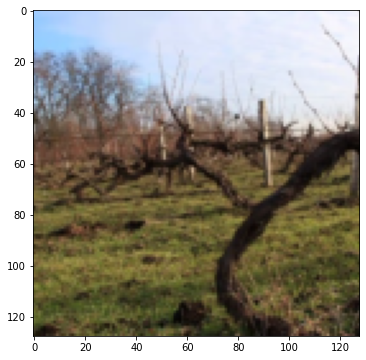

In [ ]:
plt.imshow(np.transpose(torchvision.utils.make_grid(images[1], normalize=True, padding = 1).numpy(), (1, 2, 0)))


In [ ]:
plt.imshow(np.transpose(torchvision.utils.make_grid(
  images[100:125], normalize=True, padding=1, nrow=5).numpy(), (1, 2, 0)))
plt.axis('off')

Text(0, 0.5, 'Number of training instances')

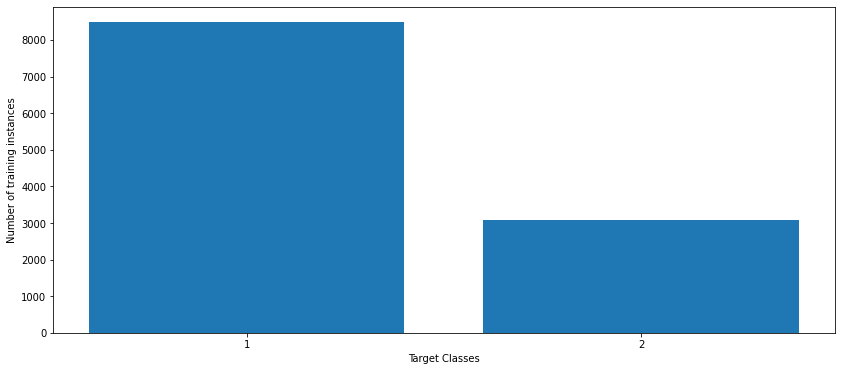

In [ ]:
#Iterating over the training dataset and storing the target class for each sample
classes = []
for batch_idx, data in enumerate(train_loader, 0):
    x, y = data 
    classes.extend(y.tolist())
      
#Calculating the unique classes and the respective counts and plotting them
unique, counts = np.unique(classes, return_counts=True)
names = list(test_dataset.class_to_idx.keys())
plt.bar(names, counts)
plt.xlabel("Target Classes")
plt.ylabel("Number of training instances")

In [ ]:
class CNN(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.features = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels=3, out_channels=128, kernel_size=8)
        torch.nn.Relu()
    )

In [ ]:
class CNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(3, 64, kernel_size = 4)
        torch.nn.ReLU()
        self.pool = torch.nn.MaxPool2d(2, 2)

        self.conv2 = torch.nn.Conv2d(64, 64, 5)
        torch.nn.ReLU()
        self.pool = torch.nn.MaxPool2d(2, 2)

        self.conv2 = torch.nn.Conv2d(64, 128, 5)
        torch.nn.ReLU()
        self.pool = torch.nn.MaxPool2d(2, 2)


        self.fc1 = torch.nn.Linear(107648 , 64)
        self.fc2 = torch.nn.Linear(64, 32)
        self.fc3 = torch.nn.Linear(32, 2)
  
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda") 
else:
    device = torch.device("cpu")
    
model = CNN().to(device)
  
#Defining the model hyper parameters
num_epochs = 20
learning_rate = 0.001
weight_decay = 0.01
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
train_loss_list = []
for epoch in range(num_epochs):
    train_loss = 0
    model.train()
    for batch in train_loader:
        images, labels = batch
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.data.item() * images.size(0)
        
    train_loss_list.append(train_loss/len(train_loader))
    print(f"Training loss = {train_loss_list[-1]}")

Training loss = 2.6930210917675494
Training loss = 6.751913365365581
Training loss = 15.693806935216097
Training loss = 12.092798829071949
Training loss = 17.444620270813985
Training loss = 34.981083947717075
Training loss = 16.267052325580774
Training loss = 19.226275412587466
Training loss = 12.50810982326389
Training loss = 11.924821872037748
Training loss = 11.712705736435069
Training loss = 14.567867583108974
Training loss = 15.60331767083378
Training loss = 20.599088112959063
Training loss = 11.17044799190871
Training loss = 9.279132493748458
Training loss = 10.244666094670473
Training loss = 11.631854428229236
Training loss = 16.364260562218966
Training loss = 11.911907954470806


Text(0, 0.5, 'Training loss')

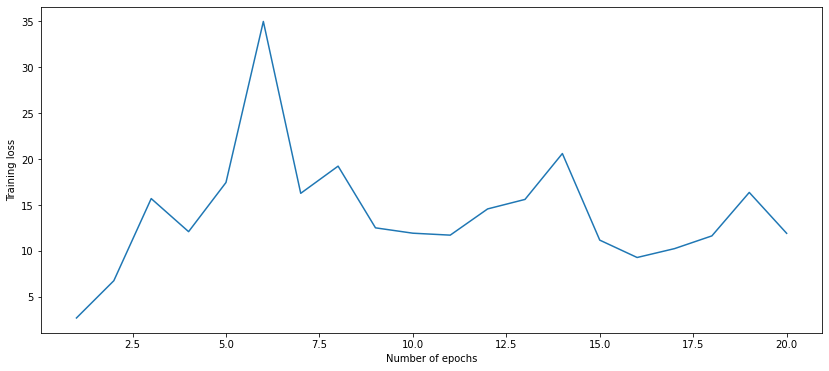

In [ ]:
#Plotting loss for all epochs
plt.plot(range(1,num_epochs+1), train_loss_list, ьф)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")

Text(0, 0.5, 'Training loss')

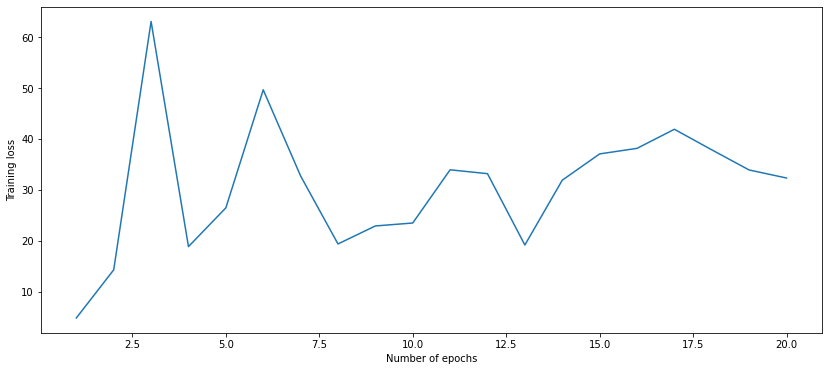

In [ ]:
#Plotting loss for all epochs
plt.plot(range(1,num_epochs+1), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")

In [ ]:
test_acc=0
model.eval()
  
with torch.no_grad():
    #Iterating over the training dataset in batches
    for i, (images, labels) in enumerate(test_loader):
          
        images = images.to(device)
        y_true = labels.to(device)
          
        #Calculating outputs for the batch being iterated
        outputs = model(images)
          
        #Calculated prediction labels from models
        _, y_pred = torch.max(outputs.data, 1)
          
        #Comparing predicted and true labels
        test_acc += (y_pred == y_true).sum().item()
      
    print(f"Test set accuracy = {100 * test_acc / len(test_dataset)} %")

Test set accuracy = 26.723095525997582 %


In [ ]:
test_acc=0
model.eval()
  
with torch.no_grad():
    #Iterating over the training dataset in batches
    for i, (images, labels) in enumerate(test_loader):
          
        images = images.to(device)
        y_true = labels.to(device)
          
        #Calculating outputs for the batch being iterated
        outputs = model(images)
          
        #Calculated prediction labels from models
        _, y_pred = torch.max(outputs.data, 1)
          
        #Comparing predicted and true labels
        test_acc += (y_pred == y_true).sum().item()
      
    print(f"Test set accuracy = {100 * test_acc / len(test_dataset)} %")

Test set accuracy = 73.27690447400242 %


In [ ]:
import torchvision.models as models

In [ ]:
import torch.nn as nn

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU())
        self.layer5 = nn.Sequential(
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(1024, 64),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(64, 64),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(64, num_classes))
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

[Ссылка](https://blog.paperspace.com/alexnet-pytorch/)

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda") 
else:
    device = torch.device("cpu")
    

num_classes = 2
num_epochs = 20
batch_size = 64
learning_rate = 0.005

model = AlexNet(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  


# Train the model
total_step = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/20], Step [181/181], Loss: 0.0004
Epoch [2/20], Step [181/181], Loss: 0.0272
Epoch [3/20], Step [181/181], Loss: 0.3441
Epoch [4/20], Step [181/181], Loss: 0.4887
Epoch [5/20], Step [181/181], Loss: 0.4865
Epoch [6/20], Step [181/181], Loss: 0.4825
Epoch [7/20], Step [181/181], Loss: 0.4853
Epoch [8/20], Step [181/181], Loss: 0.3574
Epoch [9/20], Step [181/181], Loss: 0.4889
Epoch [10/20], Step [181/181], Loss: 0.4867
Epoch [11/20], Step [181/181], Loss: 0.4857
Epoch [12/20], Step [181/181], Loss: 0.4850
Epoch [13/20], Step [181/181], Loss: 0.4794
Epoch [14/20], Step [181/181], Loss: 0.4550
Epoch [15/20], Step [181/181], Loss: 0.2809
Epoch [16/20], Step [181/181], Loss: 0.4922
Epoch [17/20], Step [181/181], Loss: 0.4869
Epoch [18/20], Step [181/181], Loss: 0.4868
Epoch [19/20], Step [181/181], Loss: 0.4868
Epoch [20/20], Step [181/181], Loss: 0.4868


In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        del images, labels, outputs

    print('Accuracy of the network on the {} test images: {} %'.format(10000, 100 * correct / total))   

Accuracy of the network on the 10000 test images: 26.723095525997582 %
